In [14]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
df = pd.read_csv("datasets/costumer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6713,4989-LIXVT,Male,1,No,No,68,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.90,6503.2,No
999,3234-VKACU,Male,0,No,No,2,Yes,No,DSL,No,...,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,70.30,132.4,No
5075,4879-GZLFH,Female,0,Yes,Yes,42,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.15,3875.4,No
6272,4636-OLWOE,Male,0,No,Yes,54,Yes,No,DSL,No,...,Yes,Yes,No,No,One year,Yes,Electronic check,61.00,3283.05,No
2830,1699-UOTXU,Male,0,No,No,60,Yes,No,DSL,Yes,...,Yes,No,No,No,Two year,No,Electronic check,61.40,3638.25,No


In [16]:
df.drop('customerID', axis='columns', inplace=True)

In [17]:
df = df[df.TotalCharges!=' ']

In [18]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [19]:
qtt_churn_yes = len(df[df.Churn=='Yes'])
tenure_churn_no = df[df.Churn=='No'][:qtt_churn_yes].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

len(tenure_churn_no), len(tenure_churn_yes)

(1869, 1869)

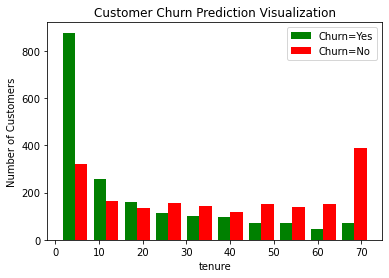

In [20]:
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [21]:
mc_churn_no = df[df.Churn=='No'][:qtt_churn_yes].MonthlyCharges
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges

len(mc_churn_no), len(mc_churn_yes)

(1869, 1869)

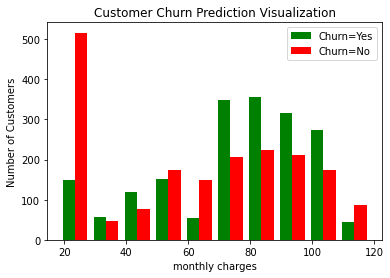

In [22]:
plt.xlabel('monthly charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.hist([mc_churn_yes, mc_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [23]:
def print_unique_col_values(df):
    for column in df:
        print(column, df[column].unique())

In [24]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [25]:
binary_columns = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling',
    'Churn'
]

for column in binary_columns:
    df[column].replace({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}, inplace=True)

In [26]:
df = pd.get_dummies(data=df, columns=[
    'InternetService',
    'Contract',
    'PaymentMethod'
])

In [27]:
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [28]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [30]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [31]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [32]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

2022-07-24 18:17:21.719360: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-24 18:17:21.719709: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-24 18:17:21.719956: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-24 18:17:21.805730: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-24 18:17:21.826968: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2893170000 Hz


Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5335 - accuracy: 0.7475
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4379 - accuracy: 0.7875
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8041
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4058 - accuracy: 0.8124
Epoch 5/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4297 - accuracy: 0.7971
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8165
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8086
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8008
Epoch 10/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4028 - accura

Epoch 81/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3628 - accuracy: 0.8283
Epoch 82/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.8370
Epoch 83/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3537 - accuracy: 0.8288
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3505 - accuracy: 0.8392
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3618 - accuracy: 0.8261
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8385
Epoch 87/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8395
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8353
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8334
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3546

In [33]:
# Handling imbalanced dataset

In [34]:
count_class_0, count_class_1 = df.Churn.value_counts()
count_class_0, count_class_1

(5163, 1869)

In [35]:
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [36]:
# Method 1: Random under-sampling

In [37]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [38]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [39]:
y_train.value_counts()

1    1495
0    1495
Name: Churn, dtype: int64

In [40]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6589 - accuracy: 0.5994
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5365 - accuracy: 0.7421
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.7565
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7650
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7574
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7566
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4993 - accuracy: 0.7542
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5125 - accuracy: 0.7400
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7516
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7419
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8179
Epoch 84/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4065 - accuracy: 0.8132
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.8116
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.8136
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4064 - accuracy: 0.8136
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3963 - accuracy: 0.8161
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8222
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8136
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8033
Epoch 92/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8233
Epoch 93/100


In [41]:
# Method 2 : Oversampling

In [42]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [43]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [44]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [45]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6381 - accuracy: 0.6661
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5245 - accuracy: 0.7489
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7483
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7718
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4925 - accuracy: 0.7644
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7534
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7684
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4946 - accuracy: 0.7630
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7684
Epoch 11/

94/94 [==============================] - 0s 2ms/step - loss: 0.4097 - accuracy: 0.8153
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3956 - accuracy: 0.8240
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8270
Epoch 86/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4128 - accuracy: 0.8173
Epoch 87/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3931 - accuracy: 0.8189
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4087 - accuracy: 0.8125
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.8016
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8123
Epoch 91/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.8173
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4077 - accuracy: 0.8150
Epoch 93/100


In [46]:
# Method 3 : SMOTE

In [51]:
X = df.drop('Churn', axis='columns')
y = df['Churn']

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [53]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7380
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.7954
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.7975
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4172 - accuracy: 0.8032
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8038
Epoch 6/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4108 - accuracy: 0.8102
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4227 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4169 - accuracy: 0.8102
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8180
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3965 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3746 - accuracy: 0.8230
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.8274
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3743 - accuracy: 0.8233
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3683 - accuracy: 0.8293
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3681 - accuracy: 0.8306
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3705 - accuracy: 0.8199
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3715 - accuracy: 0.8290
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3607 - accuracy: 0.8322
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3642 - accuracy: 0.8293
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3601 - accuracy: 

In [55]:
# Method 4 : Use of ensemble with undersampling

In [58]:
df_class_0 = df[df['Churn'] == 0]
df_class_1 = df[df['Churn'] == 1]
df_class_0.shape, df_class_1.shape

((5163, 27), (1869, 27))

In [60]:
df_0_class_0 = df_class_0[:1896]
df_0_train = pd.concat([df_class_1, df_0_class_0], axis=0)

df_1_class_0 = df_class_0[1896:1896*2]
df_1_train = pd.concat([df_class_1, df_1_class_0], axis=0)

In [61]:
X_0 = df_0_train.drop('Churn', axis='columns')
y_0 = df_0_train['Churn']

X_1 = df_1_train.drop('Churn', axis='columns')
y_1 = df_1_train['Churn']

y_0.value_counts(), y_1.value_counts()

(0    1896
 1    1869
 Name: Churn, dtype: int64,
 0    1896
 1    1869
 Name: Churn, dtype: int64)

In [62]:
from sklearn.model_selection import train_test_split
X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

In [63]:
y_0_preds = ANN(X_0_train, y_0_train, X_0_test, y_0_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.6057 - accuracy: 0.6319
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.7965
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.7943
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.8116
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4049 - accuracy: 0.8136
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4198 - accuracy: 0.8015
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4200 - accuracy: 0.8017
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4165 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4146 - accuracy: 0.8097
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4151 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3658 - accuracy: 0.8318
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3578 - accuracy: 0.8387
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3605 - accuracy: 0.8321
Epoch 84/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3720 - accuracy: 0.8201
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3617 - accuracy: 0.8328
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3575 - accuracy: 0.8303
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3523 - accuracy: 0.8426: 0s - loss: 0.3325 
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3623 - accuracy: 0.8348
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3515 - accuracy: 0.8337
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss:

In [64]:
y_1_preds = ANN(X_1_train, y_1_train, X_1_test, y_1_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5632 - accuracy: 0.7175
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.7948
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4299 - accuracy: 0.7998
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8022
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8043
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8133
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4078 - accuracy: 0.8147
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8133
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4113 - accuracy: 0.8097
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4088 - accura

Epoch 81/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8376
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.8427
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8311
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8398
Epoch 85/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8426
Epoch 86/100
176/176 [==============================] - 0s 3ms/step - loss: 0.3572 - accuracy: 0.8380
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.8394
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3543 - accuracy: 0.8354
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3414 - accuracy: 0.8476
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3604